<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">استفاده از شبکه‌های از قبل آموزش داده شده
</div></center></h1>

[Keras Applications](https://keras.io/api/applications/)

In [ ]:
import os
os.path.expanduser('~/.keras/models')

'C:\\Users\\Alireza/.keras/models'

In [2]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
#import keras.utils as image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np


In [3]:
model = VGG16(weights='imagenet')

553467096/553467096 [==============================] - 4s 0us/step


In [22]:
img_path = 'photo.jpg'


In [23]:
### بردن عکس به سایز شبکه vgg16
img = image.load_img(img_path, target_size=(224, 224))

### به آرایه تبدیل کردن
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)


In [24]:
### پیش پردازش داده متناسب با خود شبکه
x = preprocess_input(x)



In [25]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 18ms/step
Predicted: [('n03291819', 'envelope', 0.1423003), ('n04344873', 'studio_couch', 0.082564), ('n03642806', 'laptop', 0.051458362)]


In [26]:
np.max(preds) #### احتمال کلاس برنده


0.1423003

In [27]:
np.argmax(preds)#### خود کلاس

549

Using webcam

In [17]:
import cv2


In [20]:
cap = cv2.VideoCapture(1)


<IPython.core.display.Javascript object>

Saved to photo.jpg


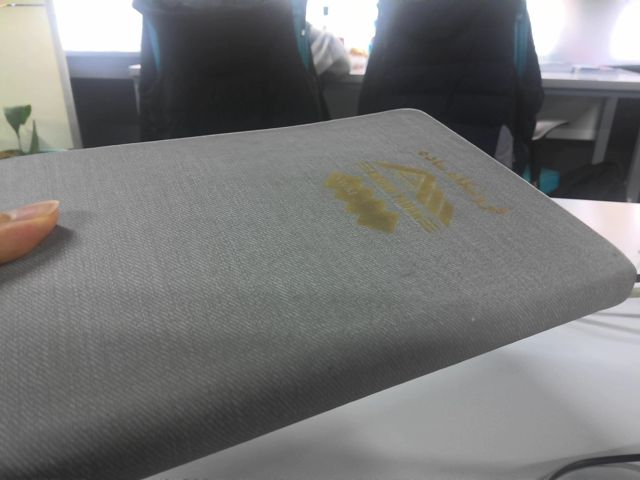

In [21]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# عکس گرفتن و ذخیره آن به عنوان یک فایل
filename = take_photo()
print('Saved to {}'.format(filename))

# نمایش تصویر گرفته شده
from IPython.display import Image
display(Image(filename))
